In [2]:
import os
import json
import glob
import psycopg2
import pandas as pd
from sql_queries import *
import matplotlib

In [3]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()

In [4]:
top_10_users_query = """
SELECT
    sp.user_id,
    u.first_name,
    u.last_name,
    u.level,
    u.gender,
    COUNT(DISTINCT sp.session_id) as session_count
FROM SongPlayFact sp
INNER JOIN UserDim u
ON u.user_id = sp.user_id
GROUP BY 
    sp.user_id,
    u.first_name,
    u.last_name,
    u.level,
    u.gender
ORDER BY session_count DESC
LIMIT 10
"""

In [5]:
cur.execute(top_10_users_query)
# results = cur.fetchall()
results = cur.fetchall()

for row in results:
    print(row)

(26, 'Ryan', 'Smith', 'free', 'M', 55)
(49, 'Chloe', 'Cuevas', 'paid', 'F', 42)
(80, 'Tegan', 'Levine', 'paid', 'F', 33)
(32, 'Lily', 'Burns', 'free', 'F', 30)
(88, 'Mohammad', 'Rodriguez', 'free', 'M', 24)
(50, 'Ava', 'Robinson', 'free', 'F', 23)
(101, 'Jayden', 'Fox', 'free', 'M', 22)
(86, 'Aiden', 'Hess', 'free', 'M', 17)
(66, 'Kevin', 'Arellano', 'free', 'M', 17)
(69, 'Anabelle', 'Simpson', 'free', 'F', 16)


In [6]:
df_headings = ("UserID","FirstName","LastName","Level","Gender","SessionCount")
df = pd.DataFrame(results, columns=df_headings)
df["FullName"] = df["FirstName"] + " " + df["LastName"]
df["Color"] = df["Gender"].apply(lambda x: 'b' if x == "M" else "m")
df.head()

,UserID,FirstName,LastName,Level,Gender,SessionCount,FullName,Color
0,26,Ryan,Smith,free,M,55,Ryan Smith,b
1,49,Chloe,Cuevas,paid,F,42,Chloe Cuevas,m
2,80,Tegan,Levine,paid,F,33,Tegan Levine,m
3,32,Lily,Burns,free,F,30,Lily Burns,m
4,88,Mohammad,Rodriguez,free,M,24,Mohammad Rodriguez,b


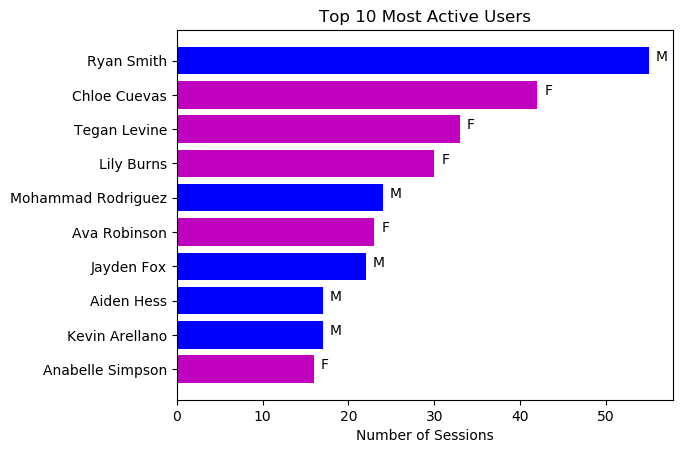

In [7]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = df["FullName"]
y_pos = np.arange(len(people))
sessions = df["SessionCount"]
#error = np.random.rand(len(people))

ax.barh(y_pos, sessions, align='center', color=df["Color"])
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Sessions')
ax.set_title('Top 10 Most Active Users')

for x,y in zip(sessions, y_pos):

    name = df.loc[df["SessionCount"]== x,"FullName"].values[0]
    label = df.loc[df['FullName'] == name, 'Gender'].values[0]

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(5,0), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center)


plt.show()

plt.savefig('images/top_10_users.png')